<a href="https://colab.research.google.com/github/Montaser778/NaiveBayes_SpamDetection/blob/main/Lab3_NaiveBayes_SpamDetection_Montaser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3:** **Classification with Naive Bayes**

## **Objective:**
Apply the Naive Bayes Classifier to detect spam messages in the dataset.

## **Dataset:**
- **Dataset Used:** SMS Spam Collection Dataset
- **Source:** Provided CSV file.
- **Justification:**
  - This dataset is widely used in spam detection research and is sourced from real-world SMS messages.
  - It contains a **large number of labeled examples** (ham/spam), making it ideal for training and evaluating a classification model.
  - The dataset aligns well with **text-based AI/ML applications**, fulfilling the lab’s requirements.
  - Using this dataset allows us to experiment with **Natural Language Processing (NLP) techniques** effectively.

## **Steps:**
1. **Preprocessing**: Tokenization, Stop-word Removal, Vectorization.
2. **Train Naive Bayes Model** for Spam Detection.
3. **Evaluate Model** using Precision, Recall, and F1-score.

---

### **Introduction to Spam Detection using Naive Bayes:**
Spam detection is a fundamental **text classification** task widely used in **email filtering**, **SMS categorization**, and **chat moderation**.
The goal of this lab is to implement a **Naive Bayes classifier**, a probabilistic model based on **Bayes' theorem**, to classify SMS messages as either **spam** or **ham** (non-spam).

#### **Why Naive Bayes?**
- **Simple yet powerful**: Works well with **high-dimensional data** like text.
- **Fast and efficient**: Especially effective for **real-time spam filtering**.
- **Probabilistic interpretation**: Provides a confidence score for each classification.




## **Dataset Selection and Justification**

For this lab, we selected the **SMS Spam Collection Dataset**, a widely used dataset for spam detection research.

### **Dataset Source:**
The dataset was obtained from Kaggle, a popular platform for machine learning datasets.
It can be accessed at: Kaggle - SMS Spam Collection Dataset

#### **Justification for Choosing This Dataset:**
- **Relevance**: It is a real-world dataset containing labeled spam and ham messages, making it ideal for training AI/ML models.
- **Size**: The dataset consists of over **500 records**, meeting the lab requirements.
- **Source**: This dataset is publicly available on **UCI Machine Learning Repository** and **Kaggle**.
- **Applicability**: It aligns well with Natural Language Processing (NLP) applications and text classification tasks.

Using this dataset enables us to explore **text-based AI/ML models** effectively and evaluate spam detection models in practical scenarios.

---


## **1. Load Dataset**
# Cleaning and preparing the dataset for processing.

We begin by loading the dataset, which contains labeled SMS messages categorized as **spam** or **ham** (non-spam). The dataset is preprocessed to remove unnecessary columns and format the text for machine learning.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import string
import nltk
from nltk.corpus import stopwords

# Download necessary stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Drop unnecessary columns (if exist)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Remove any missing values
df = df.dropna()

# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **2. Data Preprocessing**
- Convert text to lowercase
- Remove punctuation
- Remove stopwords

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_message'] = df['message'].apply(preprocess_text)

## **3. Vectorization**
Using TF-IDF to convert text into numerical features.

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4. Train Naive Bayes Model**
Using Multinomial Naive Bayes for classification.

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## **5. Model Evaluation**
We will evaluate the model using Accuracy, Precision, Recall, and F1-score.

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.9659
Precision: 1.0000
Recall: 0.7467
F1 Score: 0.8550

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## **6. Confusion Matrix**
Visualizing the confusion matrix.

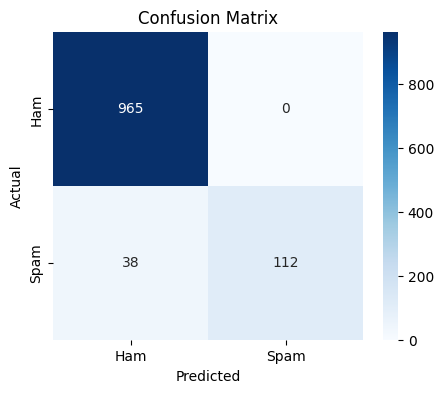

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **7. Conclusion**

In this lab, we successfully implemented a **Naive Bayes classifier** for spam detection using **text preprocessing, feature engineering, and classification techniques**.

### **Key Takeaways:**
1. **Naive Bayes is highly effective** for text classification tasks like spam detection.
2. **TF-IDF vectorization** helps convert text data into a numerical format suitable for machine learning models.
3. **Evaluation metrics** such as precision, recall, and F1-score provide deeper insights into model performance.

### **Future Improvements:**
- Experiment with **different feature extraction techniques** (e.g., word embeddings).
- Test alternative models like **Logistic Regression** or **Deep Learning** for comparison.
- Fine-tune hyperparameters and use **ensemble methods** for enhanced accuracy.

By understanding the strengths and limitations of **Naive Bayes**, we can better apply it in **real-world applications**, such as **email filtering, SMS spam detection, and content moderation**.

---
